In [1]:
import math
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio


In [2]:
df = pd.read_csv('spotify_data.csv')

In [3]:
df.shape

(595, 16)

In [4]:
df.head()

,Track Name,Album Name,Tempo,Key,Mode,Release Date,Energy,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Time Signature,Valence,Duration
0,Strawberry Fields Forever - 2015 Mix,The Beatles 1967 – 1970 (2023 Edition),96.221,10,1,2023-11-10,0.678,0.391,-8.773,0.3060,0.2730,0.000257,0.0965,4,0.245,252093
1,Penny Lane - 2017 Mix,The Beatles 1967 – 1970 (2023 Edition),113.225,9,1,2023-11-10,0.505,0.647,-8.260,0.0351,0.0715,0.002810,0.1840,4,0.682,180947
2,Sgt. Pepper's Lonely Hearts Club Band - 2017 Mix,The Beatles 1967 – 1970 (2023 Edition),95.686,7,1,2023-11-10,0.825,0.368,-7.758,0.0997,0.0308,0.020000,0.9080,4,0.524,122120
3,With A Little Help From My Friends - 2017 Mix,The Beatles 1967 – 1970 (2023 Edition),112.240,4,1,2023-11-10,0.586,0.673,-7.946,0.0302,0.1330,0.000000,0.2520,4,0.732,164373
4,Lucy In The Sky With Diamonds - 2017 Mix,The Beatles 1967 – 1970 (2023 Edition),187.861,11,0,2023-11-10,0.539,0.244,-6.984,0.0457,0.1540,0.000000,0.1820,4,0.429,210453


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track Name        595 non-null    object 
 1   Album Name        595 non-null    object 
 2   Tempo             595 non-null    float64
 3   Key               595 non-null    int64  
 4   Mode              595 non-null    int64  
 5   Release Date      595 non-null    object 
 6   Energy            595 non-null    float64
 7   Danceability      595 non-null    float64
 8   Loudness          595 non-null    float64
 9   Speechiness       595 non-null    float64
 10  Acousticness      595 non-null    float64
 11  Instrumentalness  595 non-null    float64
 12  Liveness          595 non-null    float64
 13  Time Signature    595 non-null    int64  
 14  Valence           595 non-null    float64
 15  Duration          595 non-null    int64  
dtypes: float64(9), int64(4), object(3)
memory us

In [6]:
df.columns

Index(['Track Name', 'Album Name', 'Tempo', 'Key', 'Mode', 'Release Date',
       'Energy', 'Danceability', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Time Signature', 'Valence',
       'Duration'],
      dtype='object')

In [7]:
df['Album Name'].unique()

array(['The Beatles 1967 – 1970 (2023 Edition)',
       'The Beatles 1962 – 1966 (2023 Edition)',
       'Revolver (Super Deluxe)', 'Get Back (Rooftop Performance)',
       'Let It Be (Super Deluxe)', 'Abbey Road (Super Deluxe Edition)',
       'The Beatles', 'Live At The Hollywood Bowl',
       'Yellow Submarine Songtrack', 'Let It Be... Naked (Remastered)',
       'On Air - Live At The BBC (Vol.2)', 'Live At The BBC (Remastered)',
       'Let It Be (Remastered)', 'Abbey Road (Remastered)',
       'Yellow Submarine (Remastered)', 'The Beatles (Remastered)',
       'Magical Mystery Tour (Remastered)',
       "Sgt. Pepper's Lonely Hearts Club Band (Remastered)",
       "Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition)",
       "Sgt. Pepper's Lonely Hearts Club Band (Super Deluxe Edition)"],
      dtype=object)

In [8]:
df.nunique()

Track Name          545
Album Name           20
Tempo               593
Key                  12
Mode                  2
Release Date         17
Energy              434
Danceability        365
Loudness            580
Speechiness         374
Acousticness        502
Instrumentalness    371
Liveness            395
Time Signature        5
Valence             423
Duration            575
dtype: int64

Some notes from the Spotify API documentation on a few of these metrics that we can analyse: 

- Tempo: Beats per minute (BPM). This is like the speed of the track, as an average of the beat duration. 
- Key: As per the standard [Pitch Class notation](https://en.wikipedia.org/wiki/Pitch_class). E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. -1 if no key was detected. 
- Mode: Whether it is a major (1) or minor (0) scale.
- Energy: Exactly what it seems like - a measure from 0.0 to 1.0 of the perceived intensity and activity. E.g., death metal has high energy, while a Bach prelude scores low on the scale. 
- Loudness: In decibels (dB), these are averaged across the entire track. Correlates strongly to amplitude and values typically range between -60 and 0 db.
- Valence: This is an important one as it describes the musical positiveness from 0.0 (more negative, sad, depressed) to 1.0 (more positive, cheerful, happy etc.) 
- Danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 0.0 is least danceable and 1.0 is most danceable. This might see high correlations with Tempo, Energy and Loudness, maybe even Valence.

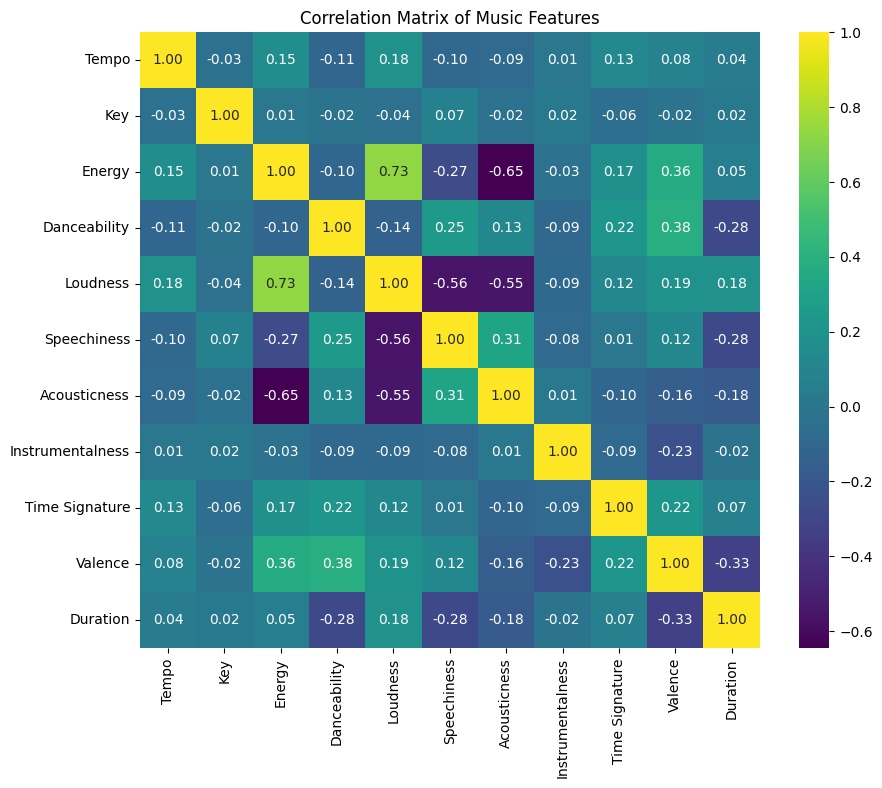

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['Tempo', 'Key', 'Energy', 'Danceability', 'Loudness', 
             'Speechiness', 'Acousticness', 'Instrumentalness', 
             'Time Signature', 'Valence', 'Duration']

correlation_matrix = df[variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Music Features')
plt.show()

Interestingly the only significant correlation is between Energy and Loudness which makes sense.
A somewhat significant inverse correlation between Energy and Acousticness is also expected, as acoustic versions tend to be calmer and quieter.
Similarly, the more "speechy" a song, the less loud it tends to be.

In [10]:
df['Release Date'] = pd.to_datetime(df['Release Date'])
df = df.sort_values(by='Release Date')


In [11]:
df

,Track Name,Album Name,Tempo,Key,Mode,Release Date,Energy,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Time Signature,Valence,Duration
594,Getting Better,Sgt. Pepper's Lonely Hearts Club Band (Super D...,121.904,0,1,1967-05-26,0.444,0.590,-11.472,0.0394,0.1310,0.000051,0.1300,4,0.718,167253
566,Penny Lane - Stereo Mix 2017,Sgt. Pepper's Lonely Hearts Club Band (Super D...,112.921,9,1,1967-05-26,0.577,0.617,-5.710,0.0388,0.0644,0.001570,0.1060,4,0.627,180693
565,Penny Lane - Vocal Overdubs And Speech,Sgt. Pepper's Lonely Hearts Club Band (Super D...,113.267,7,1,1967-05-26,0.143,0.879,-19.917,0.2610,0.7000,0.001840,0.4520,4,0.393,107093
564,Penny Lane - Take 6 / Instrumental,Sgt. Pepper's Lonely Hearts Club Band (Super D...,120.775,0,1,1967-05-26,0.548,0.901,-6.808,0.0996,0.6670,0.837000,0.1610,3,0.135,175547
563,When I'm Sixty-Four - Take 2,Sgt. Pepper's Lonely Hearts Club Band (Super D...,132.619,7,1,1967-05-26,0.218,0.816,-12.286,0.1590,0.3200,0.000000,0.0846,4,0.434,181160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,I Feel Fine - 2023 Mix,The Beatles 1962 – 1966 (2023 Edition),90.089,7,1,2023-11-10,0.880,0.527,-6.977,0.0364,0.0387,0.000000,0.1590,4,0.869,140400
54,Ticket To Ride - 2023 Mix,The Beatles 1962 – 1966 (2023 Edition),123.343,9,1,2023-11-10,0.855,0.555,-5.883,0.0683,0.0647,0.000000,0.4000,4,0.677,191080
55,Yesterday - 2023 Mix,The Beatles 1962 – 1966 (2023 Edition),96.529,5,1,2023-11-10,0.182,0.518,-10.621,0.0281,0.8650,0.000000,0.1000,4,0.296,124427
47,You Really Got A Hold On Me - 2023 Mix,The Beatles 1962 – 1966 (2023 Edition),76.859,9,1,2023-11-10,0.515,0.508,-6.039,0.0292,0.5290,0.000000,0.2400,4,0.593,181667


Quick visualization of the songs according to the release date, with some color coding of tempo. 

In [12]:
fig = px.scatter(df, x='Release Date', y='Tempo', color='Key', hover_name='Track Name', 
                 title='Time Series of Tempo and Key based on Release Date', 
                 labels={'Tempo': 'Tempo (BPM)', 'Release Date': 'Release Date', 'Key': 'Key'})

# Customize the layout
fig.update_traces(marker=dict(size=8, opacity=0.7),
                  selector=dict(mode='markers'))

# Show the plot
fig.show()

I should have seen that coming because the releases are not continuous. The songs come as part of albums which take a few years to develop. 
Also, the band broke up in 1974 so everything after that was either a rerelease, remastered or live compilations and so on.
Which means that there are repetitions in the song (also the interactive plotly visualization shows this when I hover over a few tracks).

So I filter the dataset by songs before their breakup.

In [13]:
df2 = df[df['Release Date'].dt.year < 1975]

In [15]:
fig = px.scatter(df2, x='Release Date', y='Tempo', color='Key', hover_name='Track Name', hover_data={'Album Name': True},
                 title='Tempo and Key across the years', 
                 labels={'Tempo': 'Tempo (BPM)', 'Release Date': 'Release Date', 'Key': 'Key'})

# Customize the layout
fig.update_traces(marker=dict(size=8, opacity=0.7),
                  selector=dict(mode='markers'))

# Show the plot
fig.show()

In [16]:
import plotly.io as pio


In [17]:
pio.write_html(fig, file='temporelease.html', auto_open=False)


In [31]:
df2.shape

(177, 16)

In [24]:
df2['Album Name'].unique()

array(["Sgt. Pepper's Lonely Hearts Club Band (Super Deluxe Edition)",
       "Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition)",
       "Sgt. Pepper's Lonely Hearts Club Band (Remastered)",
       'Magical Mystery Tour (Remastered)', 'The Beatles (Remastered)',
       'Yellow Submarine (Remastered)', 'Abbey Road (Remastered)',
       'Let It Be (Remastered)'], dtype=object)

In [56]:
pd.DataFrame(df2[df2['Album Name'] == "Sgt. Pepper's Lonely Hearts Club Band (Super Deluxe Edition)"]['Track Name']).sort_values(by='Track Name')

,Track Name
570,A Day In The Life - Hummed Last Chord / Takes ...
569,A Day In The Life - Orchestra Overdub
557,A Day In The Life - Remix
567,A Day In The Life - Take 1
568,A Day In The Life - Take 2
571,A Day In The Life - The Last Chord
551,Being For The Benefit Of Mr. Kite! - Remix
578,Being For The Benefit Of Mr. Kite! - Speech Fr...
579,Being For The Benefit Of Mr. Kite! - Take 7
549,Fixing A Hole - Remix


In [57]:
pd.DataFrame(df2[df2['Album Name'] == "Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition)"]['Track Name']).sort_values(by='Track Name')

,Track Name
526,A Day In The Life - Remix
539,A Day In The Life - Take 1 With Hums
520,Being For The Benefit Of Mr. Kite! - Remix
533,Being For The Benefit Of Mr. Kite! - Take 4
518,Fixing A Hole - Remix
531,Fixing A Hole - Speech And Take 3
517,Getting Better - Remix
530,Getting Better - Take 1 / Instrumental And Spe...
524,Good Morning Good Morning - Remix
537,Good Morning Good Morning - Take 8


In [58]:
pd.DataFrame(df2[df2['Album Name'] == "Sgt. Pepper's Lonely Hearts Club Band (Remastered)"]['Track Name']).sort_values(by='Track Name')

,Track Name
513,A Day In The Life - Remastered 2009
507,Being For The Benefit Of Mr. Kite! - Remastere...
505,Fixing A Hole - Remastered 2009
504,Getting Better - Remastered 2009
511,Good Morning Good Morning - Remastered 2009
510,Lovely Rita - Remastered 2009
503,Lucy In The Sky With Diamonds - Remastered 2009
501,Sgt. Pepper's Lonely Hearts Club Band - Remast...
512,Sgt. Pepper's Lonely Hearts Club Band - Repris...
506,She's Leaving Home - Remastered 2009


It seems like the Super Deluxe version contains multiple takes, instrumental versions and the 2 singles Penny Lane and Strawberry Fields Forever, along with their different takes. The same goes for the Deluxe Edition. This might be too much redundancy.

So we will just pick the 2 singles Strawberry Fields Forever - Stereo Mix 2015 and Penny Lane - Stereo Mix 2017 and add to the Remastered dataframe and work with this dataset.

In [18]:
condition1 = (df2['Album Name'] != "Sgt. Pepper's Lonely Hearts Club Band (Super Deluxe Edition)")
condition2 = (df2['Album Name'] != "Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition)")
condition3 = (df2['Album Name'] == "Sgt. Pepper's Lonely Hearts Club Band (Deluxe Edition)") & \
             ((df2['Track Name'] == "Strawberry Fields Forever - Stereo Mix 2015") |
              (df2['Track Name'] == "Penny Lane - Stereo Mix 2017"))

In [19]:
filtered_df = df2[(condition1 & condition2) | condition3]
filtered_df

,Track Name,Album Name,Tempo,Key,Mode,Release Date,Energy,Danceability,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Time Signature,Valence,Duration
513,A Day In The Life - Remastered 2009,Sgt. Pepper's Lonely Hearts Club Band (Remaste...,163.219,4,0,1967-06-01,0.457,0.364,-14.162,0.0675,0.2900,0.000106,0.9220,4,0.175,337413
512,Sgt. Pepper's Lonely Hearts Club Band - Repris...,Sgt. Pepper's Lonely Hearts Club Band (Remaste...,118.773,0,1,1967-06-01,0.889,0.653,-8.006,0.0453,0.0061,0.589000,0.8920,4,0.879,79067
506,She's Leaving Home - Remastered 2009,Sgt. Pepper's Lonely Hearts Club Band (Remaste...,127.581,4,1,1967-06-01,0.214,0.381,-11.629,0.0337,0.9440,0.000000,0.1060,3,0.393,215160
510,Lovely Rita - Remastered 2009,Sgt. Pepper's Lonely Hearts Club Band (Remaste...,87.379,8,0,1967-06-01,0.471,0.610,-9.151,0.0261,0.0634,0.000000,0.1180,4,0.630,162093
509,When I'm Sixty Four - Remastered 2009,Sgt. Pepper's Lonely Hearts Club Band (Remaste...,140.411,1,1,1967-06-01,0.241,0.704,-13.258,0.0476,0.6250,0.000028,0.0868,4,0.661,157667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,One After 909 - Remastered 2009,Let It Be (Remastered),90.950,4,1,1970-05-08,0.828,0.554,-6.435,0.0739,0.0307,0.000000,0.9070,4,0.888,173960
427,The Long And Winding Road - Remastered 2009,Let It Be (Remastered),132.282,3,1,1970-05-08,0.329,0.299,-10.096,0.0279,0.7560,0.010500,0.0559,4,0.392,218187
428,For You Blue - Remastered 2009,Let It Be (Remastered),128.542,2,1,1970-05-08,0.556,0.880,-10.773,0.0855,0.2400,0.048300,0.2400,4,0.955,152213
429,Get Back - Remastered 2009,Let It Be (Remastered),123.095,2,1,1970-05-08,0.592,0.761,-9.836,0.0586,0.4920,0.006260,0.6100,4,0.332,189387


This filtered dataframe should have 177 - 50 - 31 + 2 = 98 songs

In [61]:
filtered_df.shape

(98, 16)

Which it does. Now let's proceed.

First I want to explore how some of the important audio features are distributed.

Among the ones explained above, I am removing 

- Liveness (because we assume most of these tracks are from their studio albums), 
- Speechiness (because the songs did not have poetry or spoken words other than the lyrics which were generally evenly distributed throughout the songs)
- Instrumentalness (because most of their tracks contained vocals so this is not so interesting to explore)
- Acousticness (because this would also be generally even distribution as their songs contained a mixture of acoustic and other new sounds)

In [20]:
audio_features = ['Tempo', 'Key', 'Energy', 'Danceability', 'Loudness', 
                  'Time Signature', 'Valence', 'Duration']



In [21]:
layout_height = 450 * (len(audio_features) // 2 + 1) 

fig = make_subplots(rows=len(audio_features)//2 + 1, cols=2,
                    subplot_titles=audio_features, 
                    vertical_spacing=0.02)  

colors = px.colors.qualitative.Plotly

for i, feature in enumerate(audio_features):
    # Add a histogram for the current audio feature to the subplot
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(go.Histogram(x=filtered_df[feature], name=feature, marker_color=colors[i % len(colors)],showlegend=False), row=row, col=col)

# Update axes and layout
fig.update_xaxes(title_text='Value', row=len(audio_features)//2 + 1, col=1)
fig.update_yaxes(title_text='Count', row=len(audio_features)//2 + 1, col=1)
fig.update_layout(barmode='overlay', height=layout_height, margin=dict(b=0.1))


# Show the plot
fig.show()

The distributions show that the Tempo, Key, Energy, Danceability and Valence are somewhat normally distributed with some double peaks. Songs are generally on the louder side and between 100-200 seconds (approx.1.5 to 3 minutes).

In [94]:

# Create Bubble Chart
fig = go.Figure()
# Add traces for each track
for index, row in filtered_df.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Tempo']],
        y=[row['Duration']/(1000*60)],
        mode='markers',
        marker=dict(
            size=row['Energy'] * 50,  # Adjust the size of the bubbles based on Energy
            color=row['Valence'],  # Use Valence for the color of the bubbles
            #colorscale= 'RdYlBu',  # Set the color scale from red to blue
            cmin=filtered_df['Valence'].min(),  # Set the minimum value for the color scale
            cmax=filtered_df['Valence'].max(),  # Set the maximum value for the color scale
            opacity= 0.7, # Set the opacity based on Normalized Loudness
            colorbar=dict(
                title='Positiveness'  # Label for the colorbar
            )
        ),
        text=row['Track Name'],  # Text to display when hovering over the bubbles
        hoverinfo='text',  showlegend=False,
    ))

# Update layout
fig.update_layout(
    title='Tempo vs Duration with Energy (size) and Positiveness (color)',
    xaxis=dict(title='Tempo (BPM)'),
    yaxis=dict(title='Duration (min)')
)

# Show the plot
fig.show()

In [95]:
pio.write_html(fig, file='tempoduration.html', auto_open=False)


In [82]:
# Create Bubble Chart
fig = go.Figure()

# Add traces for each track
for index, row in filtered_df.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Energy']],
        y=[row['Duration']/(1000*60)],
        mode='markers',
        marker=dict(
            size=abs(row['Loudness']) * 3.5,  # Take the absolute value of Loudness and adjust the size of the bubbles
            color=row['Valence'],  # Use Valence for the color of the bubbles
            #colorscale='RdYlBu',  # Set the color scale from red to blue
            cmin=filtered_df['Valence'].min(),  # Set the minimum value for the color scale
            cmax=filtered_df['Valence'].max(),  # Set the maximum value for the color scale
            opacity=0.7,
            colorbar=dict(
                title='Positiveness'  # Label for the colorbar
            )
        ),
        text=row['Track Name'],  # Text to display when hovering over the bubbles
        hoverinfo='text', showlegend=False,
    ))

# Update layout
fig.update_layout(
    title='Energy vs Duration with Loudness (size) and Positiveness (color)',
    xaxis=dict(title='Energy'),
    yaxis=dict(title='Duration (min)')
)

# Show the plot
fig.show()

In [83]:
pio.write_html(fig, file='energyduration.html', auto_open=False)


In [87]:
fig = go.Figure()

# Add traces for each track
for index, row in filtered_df.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Duration']/(1000*60)],
        y=[row['Energy']],
        mode='markers',
        marker=dict(
            size=row['Danceability'] * 10,  # Adjust the size of the bubbles based on Energy
            color=row['Valence'],  # Use Valence for the color of the bubbles
            #colorscale='RdBu',  # Set the color scale from red to blue
            cmin=filtered_df['Valence'].min(),  # Set the minimum value for the color scale
            cmax=filtered_df['Valence'].max(),  # Set the maximum value for the color scale
            opacity= 0.7, # row['Normalized Loudness'],  # Set the opacity based on Normalized Loudness
            colorbar=dict(
                title='Positiveness'  # Label for the colorbar
            )
        ),
        text=row['Track Name'],  # Text to display when hovering over the bubbles
        hoverinfo='text', showlegend=False,
    ))

# Update layout
fig.update_layout(
    title='Duration vs Energy with Danceability (size) and Positiveness (color)',
    xaxis=dict(title='Duration'),
    yaxis=dict(title='Energy')
)

# Show the plot
fig.show()